# GEQIE QRCI Example

## Setup

### Imports

In [15]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

import geqie
from geqie.encodings import qrci

## Encoding

### Opening the image

In [16]:
image = Image.open("../assets/rgb4x4.png")
image = np.asarray(image)

In [17]:
print(image[:,:,0])
print(image[:,:,1])
print(image[:,:,2])

[[255 255   0 255]
 [255 255 255   0]
 [255   0 255 119]
 [  0   0   0   0]]
[[  0   0 255 255]
 [  0 255 255 128]
 [  0   0 255 119]
 [  0   0   0   0]]
[[  0   0   0   0]
 [  0   0   0   0]
 [255 255 255 119]
 [128 128   0   0]]


### Encoding using unitary gate

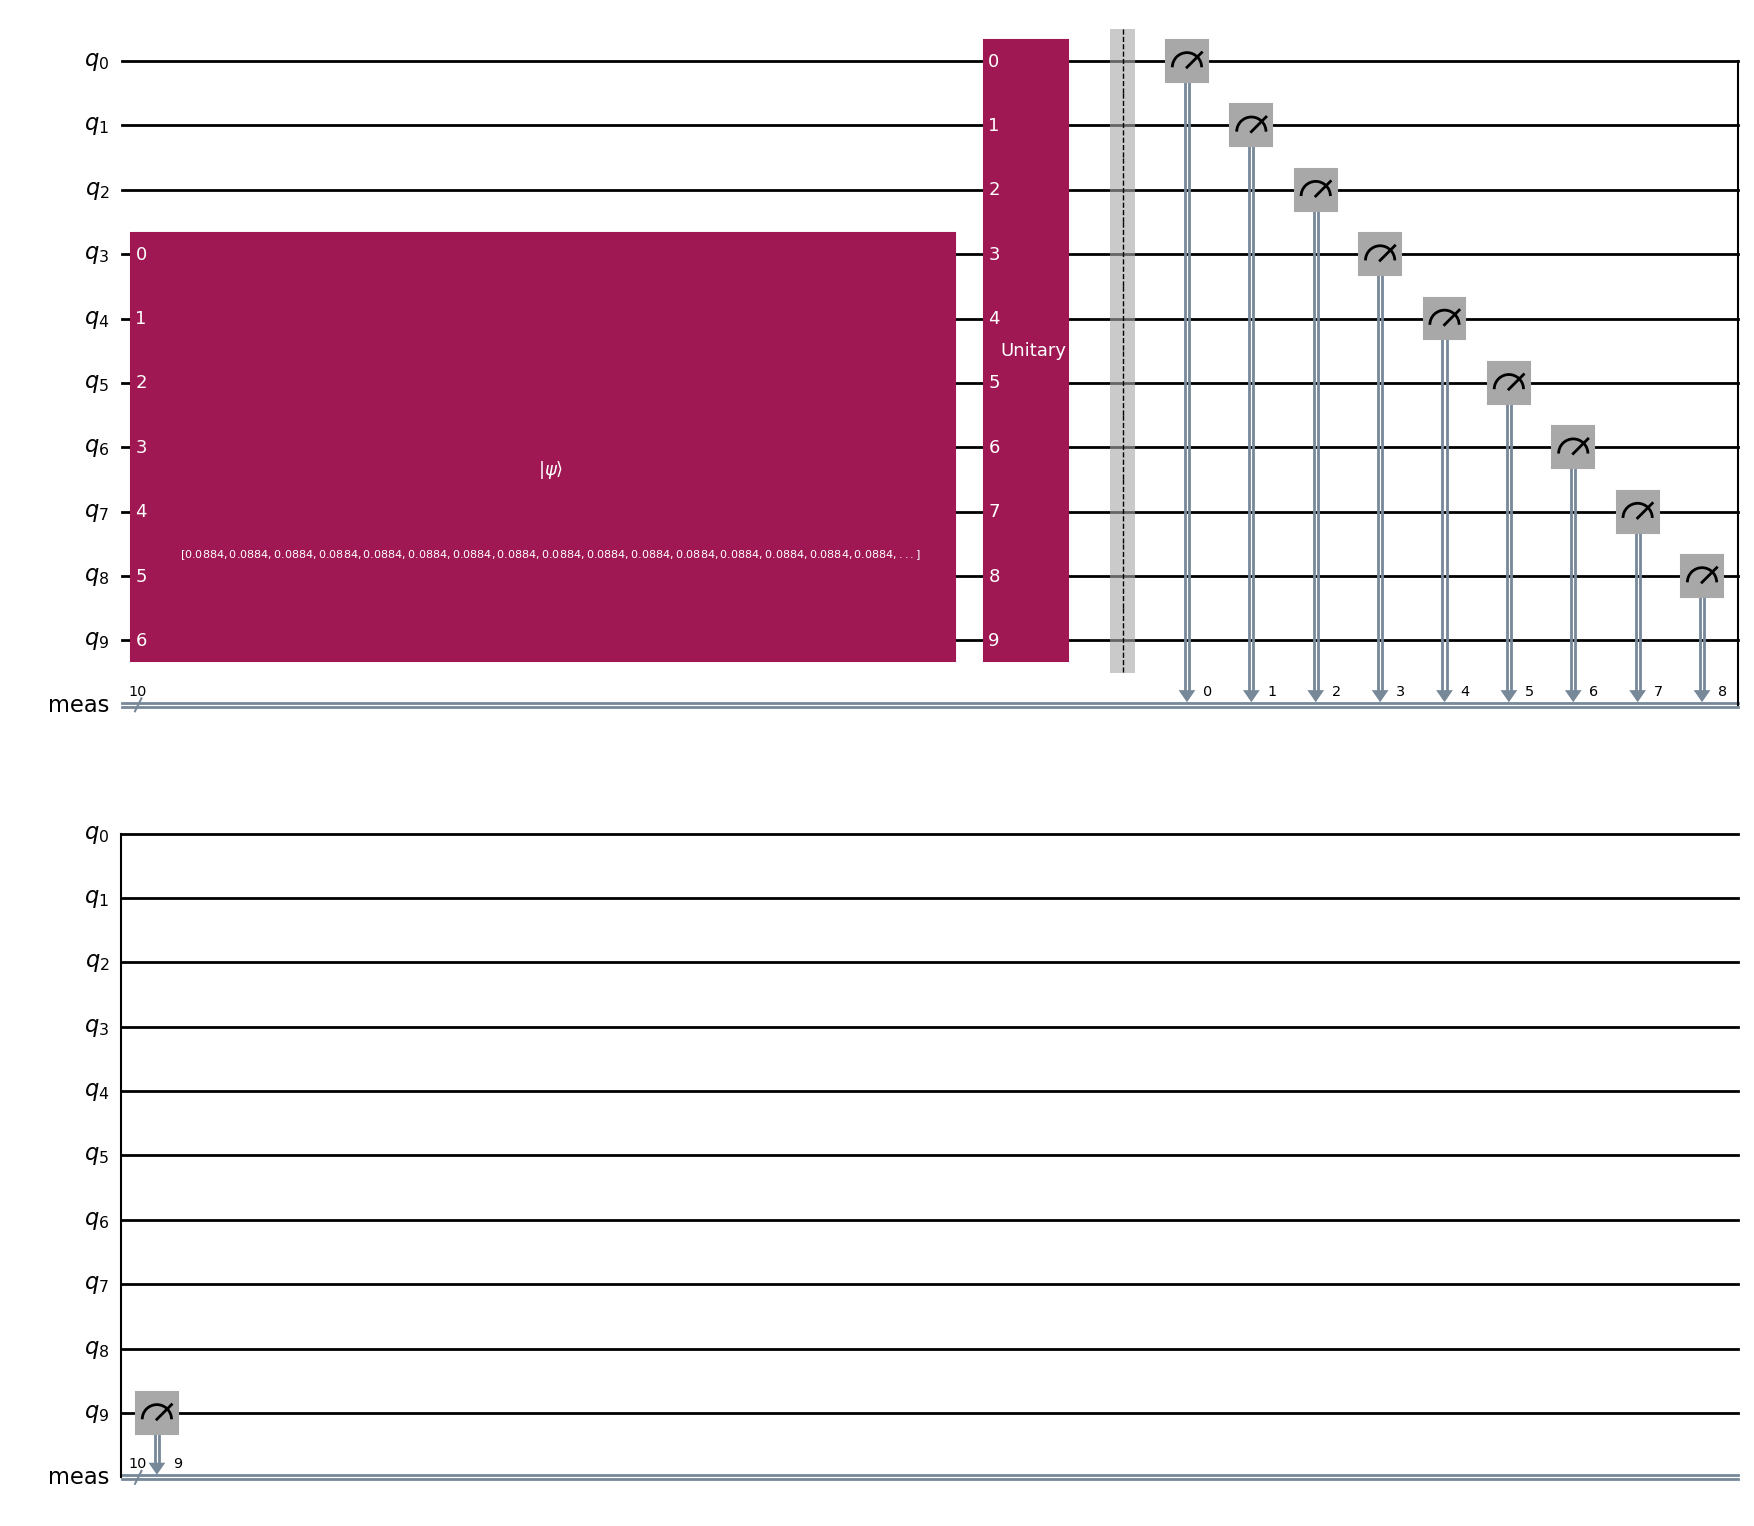

In [18]:
circuit = geqie.encode(qrci.init_function, qrci.data_function, qrci.map_function, image)
circuit.draw(output='mpl')

### Simulating the circuit

In [19]:
result = geqie.simulate(circuit, 1000)
result

{'0110011110': 9,
 '1010101111': 11,
 '1001001001': 10,
 '1000000101': 8,
 '0101010110': 14,
 '0010111010': 9,
 '0001010100': 7,
 '1111111000': 12,
 '0100011100': 10,
 '1111110000': 8,
 '1100101000': 11,
 '0101100110': 5,
 '1011110111': 10,
 '1110010000': 6,
 '0000000100': 8,
 '1001010001': 7,
 '0110100110': 9,
 '0110110110': 8,
 '0110101110': 6,
 '1111010000': 5,
 '1010110111': 10,
 '0100110100': 6,
 '0100101100': 13,
 '0110111110': 7,
 '1111000000': 10,
 '1110011000': 6,
 '1001011001': 8,
 '0001001100': 7,
 '0001000100': 8,
 '0011001110': 11,
 '1111001000': 7,
 '0011000110': 8,
 '1011001111': 6,
 '1011101111': 10,
 '0111111000': 5,
 '1110101000': 8,
 '1100110000': 5,
 '1010111111': 1,
 '1101000001': 9,
 '1101011000': 12,
 '0010101010': 17,
 '1000100101': 6,
 '1101001000': 14,
 '1110000000': 10,
 '0010100010': 9,
 '1100100000': 8,
 '1011100000': 8,
 '1001101001': 7,
 '0011110110': 4,
 '1011111111': 8,
 '0000100100': 6,
 '0000111100': 8,
 '1000001101': 11,
 '0101110110': 6,
 '001111111

## Interpretation of the results

Total state $\ket{\psi}$ is equal to:
$$\ket{\psi} = \ket{X\_ coordinates}^{log_2(x)}\otimes\ket{Y\_ coordinates}^{log_2(y)}\otimes\ket{LXY}^{\otimes 3}\otimes\ket{RGB\_channel}^{\otimes 3}$$
Where:
- $\ket{X\_ coordinates}^{log_2(x)}$ and $\ket{Y\_ coordinates}^{log_2(y)}$ corresponds to X and Y positions encodings respectively,
- Next 3 qubits are used to encode label mask of intensity for single channel, for example: $77 = \ket{0100\_1101}$ (corresponds to $2^6+2^3+2^2+2^0$),
- Last 3 qubits are used to encode $\ket{RGB}$ channel


In [20]:
reconstructed_image = np.zeros_like(image)

for state, n in result.items():
    if n > 0:
        x = state[0:2]
        y = state[2:4]
        lxy = state[4: 4+3]
        rgb = state[4+3: 4+3+3]


        lxy_dec = abs(int(lxy, base=2)-7)
        x_dec = int(x, base=2)
        y_dec = int(y, base=2)

        if rgb[0] == '1':
            reconstructed_image[x_dec, y_dec, 0] += (2**(lxy_dec))
        if rgb[1] == '1':
            reconstructed_image[x_dec, y_dec, 1] += (2**(lxy_dec))
        if rgb[2] == '1':
            reconstructed_image[x_dec, y_dec, 2] += (2**(lxy_dec))

print("Original image:")
print(image[:,:,2])
print("Reconstructed image:")
print(reconstructed_image[:,:,2])


Original image:
[[  0   0   0   0]
 [  0   0   0   0]
 [255 255 255 119]
 [128 128   0   0]]
Reconstructed image:
[[  0   0   0   0]
 [  0   0   0   0]
 [255 255 255 119]
 [128 128   0   0]]


### Reconstructed image

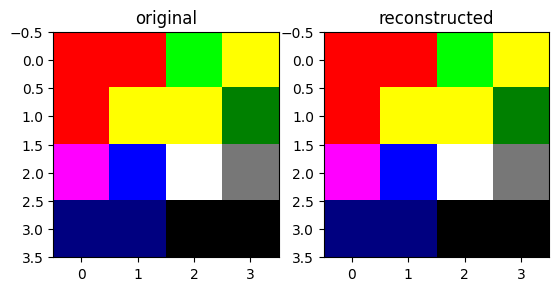

In [21]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image)

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(reconstructed_image)